In [1]:
import adetsim.sim_src.AttenuationData as ad
import matplotlib.pyplot as plt
import numpy as np
import os


OUT_DIR = './plots/'
os.makedirs(OUT_DIR, exist_ok=True)

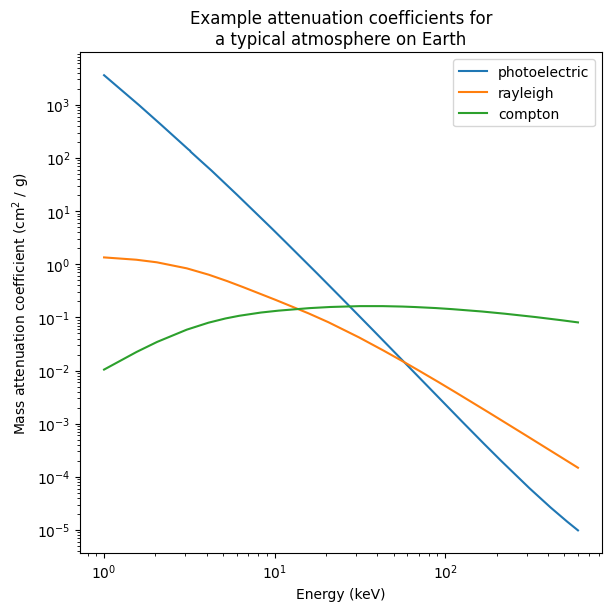

In [2]:
# Absolute values don't matter, just relative amounts
air_composition = {
    'N': 7.81,
    'O': 2.09,
    'Ar': 0.01,
    'C': 0.001,
}

air_attenuation = ad.AttenuationData.from_compound_dict(air_composition)
energies = np.logspace(0, np.log10(600), num=10000)

fig, ax = plt.subplots(layout='constrained', figsize=(6, 6))

for (att_type, name) in ad.AttenuationType.named().items():
    # Log-interpolate these to avoid strange features
    mass_att_coefs = np.exp(air_attenuation.log_interpolate(
        att_type, np.log(energies)
    ))
    ax.plot(energies, mass_att_coefs, label=name)

ax.legend()
ax.set(
    title='Example attenuation coefficients for\na typical atmosphere on Earth',
    xlabel='Energy (keV)',
    ylabel='Mass attenuation coefficient (cm$^2$ / g)',
    xscale='log',
    yscale='log'
)
plt.savefig(os.path.join(OUT_DIR, 'air-example.png'), dpi=120)
plt.show()